In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
iris_dataset = datasets.load_iris()
x = iris_dataset.data
y = iris_dataset.target

x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size= 0.1, random_state=42)

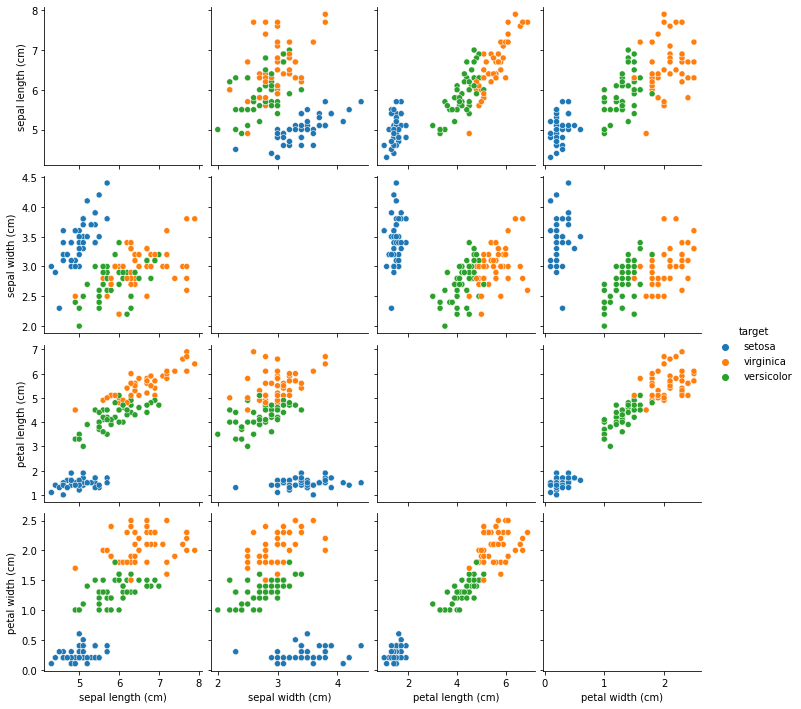

In [ ]:
df=pd.DataFrame(x_train, columns=iris_dataset.feature_names)
df1=pd.DataFrame(y_train, columns=['target'])['target'].map({0:iris_dataset.target_names[0],1:iris_dataset.target_names[1],2:iris_dataset.target_names[2]})
df=pd.merge(df,df1,right_index=True,left_index=True)
sns.pairplot(df, hue='target', diag_kind='none')#,vars = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

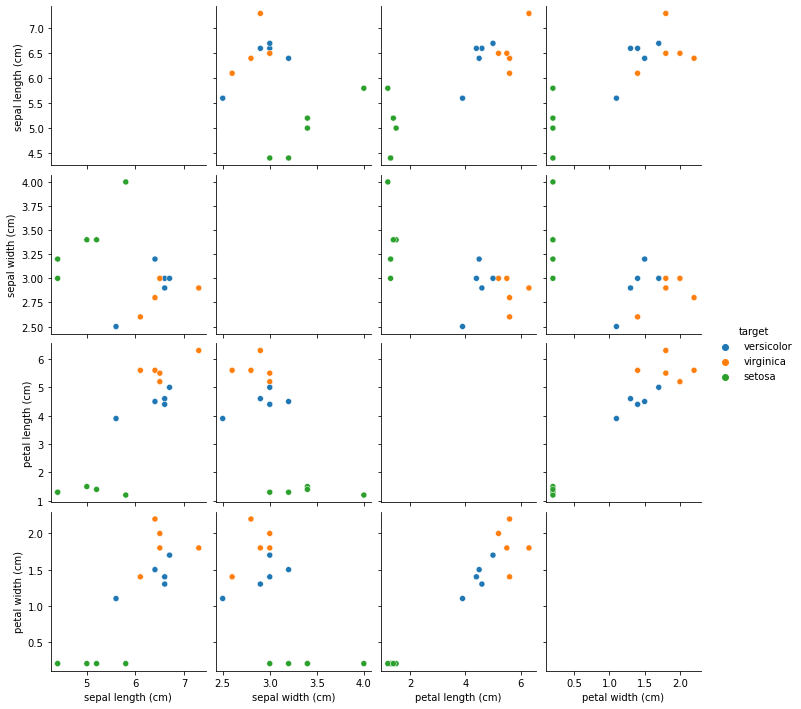

In [ ]:
df=pd.DataFrame(x_test, columns=iris_dataset.feature_names)
df1=pd.DataFrame(y_test, columns=['target'])['target'].map({0:iris_dataset.target_names[0],1:iris_dataset.target_names[1],2:iris_dataset.target_names[2]})
df=pd.merge(df,df1,right_index=True,left_index=True)
sns.pairplot(df, hue='target', diag_kind='none')

In [ ]:
comb = list(combinations(list(range(4)), 2))

In [ ]:
comb

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [ ]:
train_comb=[]
for i, v in enumerate(comb):
  for row in range(0,len(x_train)-1):
    train


0 (0, 1)
1 (0, 2)
2 (0, 3)
3 (1, 2)
4 (1, 3)
5 (2, 3)


In [ ]:
x_train[:,0]

array([4.7, 6.7, 4.4, 6.2, 5. , 4.9, 6.4, 4.8, 5.7, 4.6, 6.3, 6. , 6.1,
       6.4, 5.1, 6.3, 5. , 6.5, 5.6, 6. , 5.7, 5.2, 5.5, 5.4, 6. , 5.7,
       5.6, 5.7, 5.1, 7.7, 4.8, 6.3, 5.4, 7.1, 6.7, 5.9, 5.1, 6.1, 5. ,
       5.8, 5.6, 6.4, 6.1, 5.1, 6.3, 6.9, 5.7, 6.2, 6.5, 6.9, 5.4, 7.7,
       5.5, 4.6, 6.9, 4.8, 5.4, 6.3, 4.9, 6.1, 5.1, 6.8, 5. , 5.8, 4.5,
       5.7, 7. , 6.8, 6.7, 6.8, 5.8, 7.2, 5.6, 5.8, 4.6, 6.7, 5. , 7.6,
       5.5, 7.2, 6.2, 5.8, 5.1, 5.1, 5. , 7.9, 5.7, 6.3, 6.3, 4.9, 4.8,
       6. , 6. , 4.9, 6.4, 5.5, 5. , 6.9, 5.2, 6.3, 5.5, 5.6, 5.8, 4.8,
       6.5, 5.1, 5.7, 5.1, 4.3, 7.7, 7.4, 7.2, 5. , 5.9, 6.7, 6.3, 5.4,
       6. , 5. , 7.7, 6.7, 4.9, 5.3, 6.2, 5.5, 6.4, 5.4, 4.6, 5.9, 5.2,
       6.1, 6.7, 4.9, 4.7, 5.5])

In [ ]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [ ]:
mini=create_mini_batches(x_train[:,0],x_train[:,1],32)
mini

IndexError: ignored

In [ ]:
data = np.hstack((x_train[:,0], x_train[:,1]))
data.shape[0] //32

8

In [ ]:
mini_batch = data[0 * 32:data.shape[0]]
mini_batch

array([4.7, 6.7, 4.4, 6.2, 5. , 4.9, 6.4, 4.8, 5.7, 4.6, 6.3, 6. , 6.1,
       6.4, 5.1, 6.3, 5. , 6.5, 5.6, 6. , 5.7, 5.2, 5.5, 5.4, 6. , 5.7,
       5.6, 5.7, 5.1, 7.7, 4.8, 6.3, 5.4, 7.1, 6.7, 5.9, 5.1, 6.1, 5. ,
       5.8, 5.6, 6.4, 6.1, 5.1, 6.3, 6.9, 5.7, 6.2, 6.5, 6.9, 5.4, 7.7,
       5.5, 4.6, 6.9, 4.8, 5.4, 6.3, 4.9, 6.1, 5.1, 6.8, 5. , 5.8, 4.5,
       5.7, 7. , 6.8, 6.7, 6.8, 5.8, 7.2, 5.6, 5.8, 4.6, 6.7, 5. , 7.6,
       5.5, 7.2, 6.2, 5.8, 5.1, 5.1, 5. , 7.9, 5.7, 6.3, 6.3, 4.9, 4.8,
       6. , 6. , 4.9, 6.4, 5.5, 5. , 6.9, 5.2, 6.3, 5.5, 5.6, 5.8, 4.8,
       6.5, 5.1, 5.7, 5.1, 4.3, 7.7, 7.4, 7.2, 5. , 5.9, 6.7, 6.3, 5.4,
       6. , 5. , 7.7, 6.7, 4.9, 5.3, 6.2, 5.5, 6.4, 5.4, 4.6, 5.9, 5.2,
       6.1, 6.7, 4.9, 4.7, 5.5, 3.2, 3. , 2.9, 3.4, 3. , 3.1, 2.8, 3. ,
       2.9, 3.1, 2.3, 3. , 2.8, 3.2, 3.7, 3.3, 3.5, 2.8, 3. , 2.2, 2.6,
       2.7, 2.4, 3.7, 2.2, 3. , 2.8, 3.8, 3.8, 2.8, 3.4, 2.5, 3.4, 3. ,
       2.5, 3. , 3.8, 3. , 3.4, 2.6, 3. , 2.7, 2.8, 3.5, 3.3, 3.

In [ ]:
X_mini = mini_batch[:, :-1]
Y_mini = mini_batch[:, -1].reshape((-1, 1))

IndexError: ignored

In [ ]:
x_temp=x_train[0:31,:0]
y_temp=x_train[0:31,:1]

array([[4.7, 3.2, 1.6, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [5. , 3. , 1.6, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.4, 2.8, 5.6, 2.1],
       [4.8, 3. , 1.4, 0.3],
       [5.7, 2.9, 4.2, 1.3],
       [4.6, 3.1, 1.5, 0.2],
       [6.3, 2.3, 4.4, 1.3],
       [6. , 3. , 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.4, 3.2, 5.3, 2.3],
       [5.1, 3.7, 1.5, 0.4],
       [6.3, 3.3, 4.7, 1.6],
       [5. , 3.5, 1.3, 0.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.6, 3. , 4.5, 1.5],
       [6. , 2.2, 4. , 1. ],
       [5.7, 2.6, 3.5, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [5.5, 2.4, 3.7, 1. ],
       [5.4, 3.7, 1.5, 0.2],
       [6. , 2.2, 5. , 1.5],
       [5.7, 3. , 4.2, 1.2],
       [5.6, 2.8, 4.9, 2. ],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [7.7, 2.8, 6.7, 2. ],
       [4.8, 3.4, 1.9, 0.2]])

In [ ]:
comb = list(combinations(list(range(4)), 2)) +list(combinations(list(range(4))[::-1], 2))

In [ ]:
comb

[(0, 1),
 (0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 2),
 (3, 1),
 (3, 0),
 (2, 1),
 (2, 0),
 (1, 0)]

In [ ]:

for i, v in enumerate(comb):
  batches =[]
  for j in range(32,136,32):
    x_temp=x_train[j-32:j,0]
    y_temp=x_train[j-32:j,1]
    batches.append((x_temp,y_temp))
  else:
    x_temp=x_train[j:,0]
    y_temp=x_train[j:,1]
    batches.append((x_temp,y_temp))
  

In [ ]:
list(range(32,136,32))

[32, 64, 96, 128]

In [ ]:
x_train[32:64,0]

array([5.4, 7.1, 6.7, 5.9, 5.1, 6.1, 5. , 5.8, 5.6, 6.4, 6.1, 5.1, 6.3,
       6.9, 5.7, 6.2, 6.5, 6.9, 5.4, 7.7, 5.5, 4.6, 6.9, 4.8, 5.4, 6.3,
       4.9, 6.1, 5.1, 6.8, 5. , 5.8])

In [ ]:
for j in range(32,136,32):
  x_temp=x_train[j-32:j,0]
  y_temp=x_train[j-32:j,1]
else:
  x_temp=x_train[j:,0]
  y_temp=x_train[j:,1]

In [ ]:
x_temp

array([5.9, 5.2, 6.1, 6.7, 4.9, 4.7, 5.5])

In [ ]:
x_train[134:134,0]

array([], dtype=float64)

In [ ]:
temp = []


In [ ]:
temp.append((x_train[32:64,0],x_train[32:64,1]))

In [ ]:
temp[1]

(array([5.4, 7.1, 6.7, 5.9, 5.1, 6.1, 5. , 5.8, 5.6, 6.4, 6.1, 5.1, 6.3,
        6.9, 5.7, 6.2, 6.5, 6.9, 5.4, 7.7, 5.5, 4.6, 6.9, 4.8, 5.4, 6.3,
        4.9, 6.1, 5.1, 6.8, 5. , 5.8]),
 array([3.4, 3. , 2.5, 3. , 3.8, 3. , 3.4, 2.6, 3. , 2.7, 2.8, 3.5, 3.3,
        3.1, 4.4, 2.9, 3. , 3.1, 3. , 2.6, 3.5, 3.4, 3.1, 3. , 3.9, 2.7,
        3. , 3. , 3.5, 3.2, 3.2, 2.7]))

2

In [ ]:
batches = batchinator(x_train[:,0],x_train[:,1])
batches

[(array([4.7, 6.7, 4.4, 6.2, 5. , 4.9, 6.4, 4.8, 5.7, 4.6, 6.3, 6. , 6.1,
         6.4, 5.1, 6.3, 5. , 6.5, 5.6, 6. , 5.7, 5.2, 5.5, 5.4, 6. , 5.7,
         5.6, 5.7, 5.1, 7.7, 4.8, 6.3]),
  array([3.2, 3. , 2.9, 3.4, 3. , 3.1, 2.8, 3. , 2.9, 3.1, 2.3, 3. , 2.8,
         3.2, 3.7, 3.3, 3.5, 2.8, 3. , 2.2, 2.6, 2.7, 2.4, 3.7, 2.2, 3. ,
         2.8, 3.8, 3.8, 2.8, 3.4, 2.5])),
 (array([5.4, 7.1, 6.7, 5.9, 5.1, 6.1, 5. , 5.8, 5.6, 6.4, 6.1, 5.1, 6.3,
         6.9, 5.7, 6.2, 6.5, 6.9, 5.4, 7.7, 5.5, 4.6, 6.9, 4.8, 5.4, 6.3,
         4.9, 6.1, 5.1, 6.8, 5. , 5.8]),
  array([3.4, 3. , 2.5, 3. , 3.8, 3. , 3.4, 2.6, 3. , 2.7, 2.8, 3.5, 3.3,
         3.1, 4.4, 2.9, 3. , 3.1, 3. , 2.6, 3.5, 3.4, 3.1, 3. , 3.9, 2.7,
         3. , 3. , 3.5, 3.2, 3.2, 2.7])),
 (array([4.5, 5.7, 7. , 6.8, 6.7, 6.8, 5.8, 7.2, 5.6, 5.8, 4.6, 6.7, 5. ,
         7.6, 5.5, 7.2, 6.2, 5.8, 5.1, 5.1, 5. , 7.9, 5.7, 6.3, 6.3, 4.9,
         4.8, 6. , 6. , 4.9, 6.4, 5.5]),
  array([2.3, 2.8, 3.2, 2.8, 3.1, 3. , 2.7, 3. , 2.7,

TypeError: ignored

In [ ]:
x_temp, y_temp = batches[2]
data = np.hstack((np.ones((x_temp.shape[0], 1)), x_temp[:, None]))
w = np.random.uniform(0, 2, size=(2,))

array([1.27693014, 1.26648209])

In [ ]:
y_hat_temp = data @ w
error = mse(y_hat_temp, y_temp)
error

2.8128623245439437

In [ ]:
y_hat_temp , y_temp

(array([ 7.65503575,  9.84028442,  7.32724845,  9.29397225,  7.98282305,
         7.87356062,  9.51249712,  7.76429818,  8.74766008,  7.54577332,
         9.40323469,  9.07544739,  9.18470982,  9.51249712,  8.09208548,
         9.40323469,  7.98282305,  9.62175955,  8.63839765,  9.07544739,
         8.74766008,  8.20134792,  8.52913522,  8.41987278,  9.07544739,
         8.74766008,  8.63839765,  8.74766008,  8.09208548, 10.93290875,
         7.76429818,  9.40323469]),
 array([3.2, 3. , 2.9, 3.4, 3. , 3.1, 2.8, 3. , 2.9, 3.1, 2.3, 3. , 2.8,
        3.2, 3.7, 3.3, 3.5, 2.8, 3. , 2.2, 2.6, 2.7, 2.4, 3.7, 2.2, 3. ,
        2.8, 3.8, 3.8, 2.8, 3.4, 2.5]))

In [ ]:
w = sgd_step(w, y_hat_temp, y_temp, data)
w

array([1.14166148, 0.29093909])

In [ ]:
x_temp.shape

(32,)

In [ ]:
data = np.hstack((np.ones((x_temp.shape[0], 1)), x_temp[:, None]))

In [48]:
def mse(predictions, target):
    return (1/len(predictions)) * np.sum((predictions - target)**2)

In [82]:
def sgd_step(weights, predictions, target, data, alpha=0.001):
    diff = predictions - target
    update = diff @ data
    w_new = weights - alpha * update
    
    return w_new

In [53]:
def batchinator(x,y):
  batches =[]
  for j in range(32,136,32):
    x_temp=x[j-32:j]
    y_temp=y[j-32:j]
    batches.append((x_temp,y_temp))
  else:
    x_temp=x[j:]
    y_temp=y[j:]
    batches.append((x_temp,y_temp))
  return batches

In [102]:
error = []
w = np.random.uniform(0, 2, size=(2,)) # initialize only once
batches = batchinator(x_train[:,2],x_train[:,1])
for step in range(1,101):
  batch_error=0
  for batch in batches:
    x_temp, y_temp = batch
    data = np.hstack((np.ones((x_temp.shape[0], 1)), x_temp[:, None]))
    y_hat_temp = data @ w
    batch_error += mse(y_hat_temp, y_temp)
    w = sgd_step(w, y_hat_temp, y_temp, data)
  error.append(batch_error/len(batches))

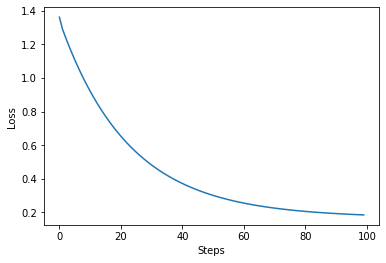

In [103]:
plt.plot(error)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.show()

In [104]:
w

array([ 3.20521245, -0.03768126])

In [105]:
x_test[:,2]

array([4.6, 5.6, 5.2, 3.9, 6.3, 1.3, 1.3, 1.5, 5.6, 4.4, 1.2, 5.5, 4.5,
       5. , 1.4])

In [106]:
data = np.hstack((np.ones((x_test[:,2].shape[0], 1)), x_test[:,2][:, None]))
mse(data @ w, x_test[:,1])

array([3.03187865, 2.99419739, 3.00926989, 3.05825553, 2.9678205 ,
       3.15622681, 3.15622681, 3.14869056, 2.99419739, 3.0394149 ,
       3.15999494, 2.99796551, 3.03564677, 3.01680614, 3.15245868])

In [108]:
x_test[:,1]

array([2.9, 2.6, 3. , 2.5, 2.9, 3.2, 3. , 3.4, 2.8, 3. , 4. , 3. , 3.2,
       3. , 3.4])

0.09413650871800316

AttributeError: ignored

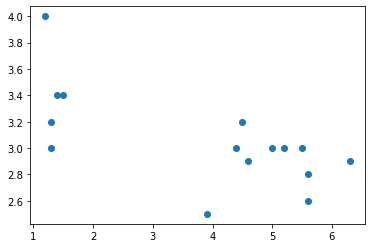

In [123]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.scatter(x_test[:,2], x_test[:,1])
plt.axline((0, w[0]), slope=w[1], c='b')
for i in range(len(x_test[:,2])):
    ax.plot([x_test[:,2][i], x_test[:,2][i]], [x_test[:,1][i], (data@w)[i]], c='r', linewidth=0.5)

In [115]:
(data@w)[0]

3.0318786474947252